In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
#reading the csv file
table1 = pd.read_csv('Final-Feature Engineering.csv')
table1

,Date,home_team,away_team,half_Time_score,full_Time_score,firsthalf_home_goals,firsthalf_away_goals,total_home_goals,total_away_goals,firsthalf_result,result,Season
0,Sat Aug 8 2015,Bournemouth,Aston Villa,0-0,0-1,0,0,0,1,Draw,Aston Villa,2015-2016
1,Sat Aug 8 2015,Chelsea,Swansea,2-1,2-2,2,1,2,2,Chelsea,Draw,2015-2016
2,Sat Aug 8 2015,Everton,Watford,0-1,2-2,0,1,2,2,Watford,Draw,2015-2016
3,Sat Aug 8 2015,Leicester,Sunderland,3-0,4-2,3,0,4,2,Leicester,Leicester,2015-2016
4,Sat Aug 8 2015,Man United,Tottenham,1-0,1-0,1,0,1,0,Man United,Man United,2015-2016
...,...,...,...,...,...,...,...,...,...,...,...,...
1803,Sat Mar 7 2020,Wolves,Brighton,0-0,0-0,0,0,0,0,Draw,Draw,2019-2020
1804,Sat Mar 7 2020,Burnley,Tottenham,1-0,1-1,1,0,1,1,Burnley,Draw,2019-2020
1805,Sun Mar 8 2020,Chelsea,Everton,2-0,4-0,2,0,4,0,Chelsea,Chelsea,2019-2020
1806,Sun Mar 8 2020,Man United,Man City,1-0,2-0,1,0,2,0,Man United,Man United,2019-2020


In [3]:
#to count the games played for 5 seasons by adding home games and away games
df_games_1 = pd.DataFrame({'home_games' : table1.groupby("home_team")['home_team'].count()}).reset_index()
df_games_2 = pd.DataFrame({'away_games' : table1.groupby("away_team")['away_team'].count()}).reset_index()
df_games = pd.concat([df_games_1, df_games_2], axis=1)

df_games['games'] = df_games_1['home_games'] + df_games_2['away_games']
#Deleting the away team, home games and away games 
df_games = df_games.drop(columns=['away_team', 'home_games', 'away_games'])

#renamimng the home team to team
df_games = df_games.rename(columns={'home_team': 'team'})

#to count the total goals scored for 5 seasons for each team by using the groupby method
df_home_goals = pd.DataFrame({'home_goals' : table1.groupby("home_team")['total_home_goals'].sum()}).reset_index()
df_away_goals = pd.DataFrame({'away_goals' : table1.groupby("away_team")['total_away_goals'].sum()}).reset_index()

#Adding both home goals and away goals
df_goals_scored = pd.concat([df_home_goals, df_away_goals], axis=1)
df_goals_scored['goals'] = df_goals_scored['home_goals'] + df_goals_scored['away_goals']

#Deleting the away team, home goals and away goals 
df_goals_scored = df_goals_scored.drop(columns=['away_team', 'home_goals', 'away_goals'])

#renamimng the home team to team
df_goals_scored = df_goals_scored.rename(columns={'home_team': 'team'})

columns = df_games.copy()
columns = columns.merge(right=df_goals_scored, on='team')

#calculating the total wons for 5 seasons
df_won = pd.DataFrame({'won' : table1['result'].value_counts()}).reset_index()
df_won = df_won.drop([0])
df_won = df_won.rename(columns={'index': 'team'})

columns1 = columns.copy()
columns1 = columns1.merge(right=df_won, on='team')

#calculating the total draws for 5 seasons
draw_filter = table1[table1['result'] == 'Draw']
df_draw_home = pd.DataFrame({'draw_home' : draw_filter['home_team'].value_counts()}).reset_index()
df_draw_away = pd.DataFrame({'draw_away' : draw_filter['away_team'].value_counts()}).reset_index()

df_draw = df_draw_home.merge(right=df_draw_away, on='index')
df_draw['draw'] = df_draw['draw_home'] + df_draw['draw_away']
df_draw = df_draw.drop(columns=['draw_home', 'draw_away'])
df_draw = df_draw.rename(columns={'index': 'team'})
df_draw

columns1 = columns1.merge(right=df_draw, on='team')
columns1['lost'] = columns1['games'] - columns1['won'] - columns1['draw']
columns1['points'] = (columns1['won'] * 3) + (columns1['draw'])

columns1['pos'] = range(1,len(columns1)+1)
columns1 = columns1[['team', 'games', 'won', 'draw', 'lost', 'points']]
columns1

,team,games,won,draw,lost,points
0,Arsenal,180,92,43,45,319
1,Aston Villa,66,10,12,44,42
2,Bournemouth,181,54,42,85,204
3,Brighton,105,24,33,48,105
4,Burnley,143,47,32,64,173
5,Cardiff,38,10,4,24,34
6,Chelsea,181,98,39,44,333
7,Crystal Palace,181,58,41,82,215
8,Everton,181,66,50,65,248
9,Fulham,38,7,5,26,26


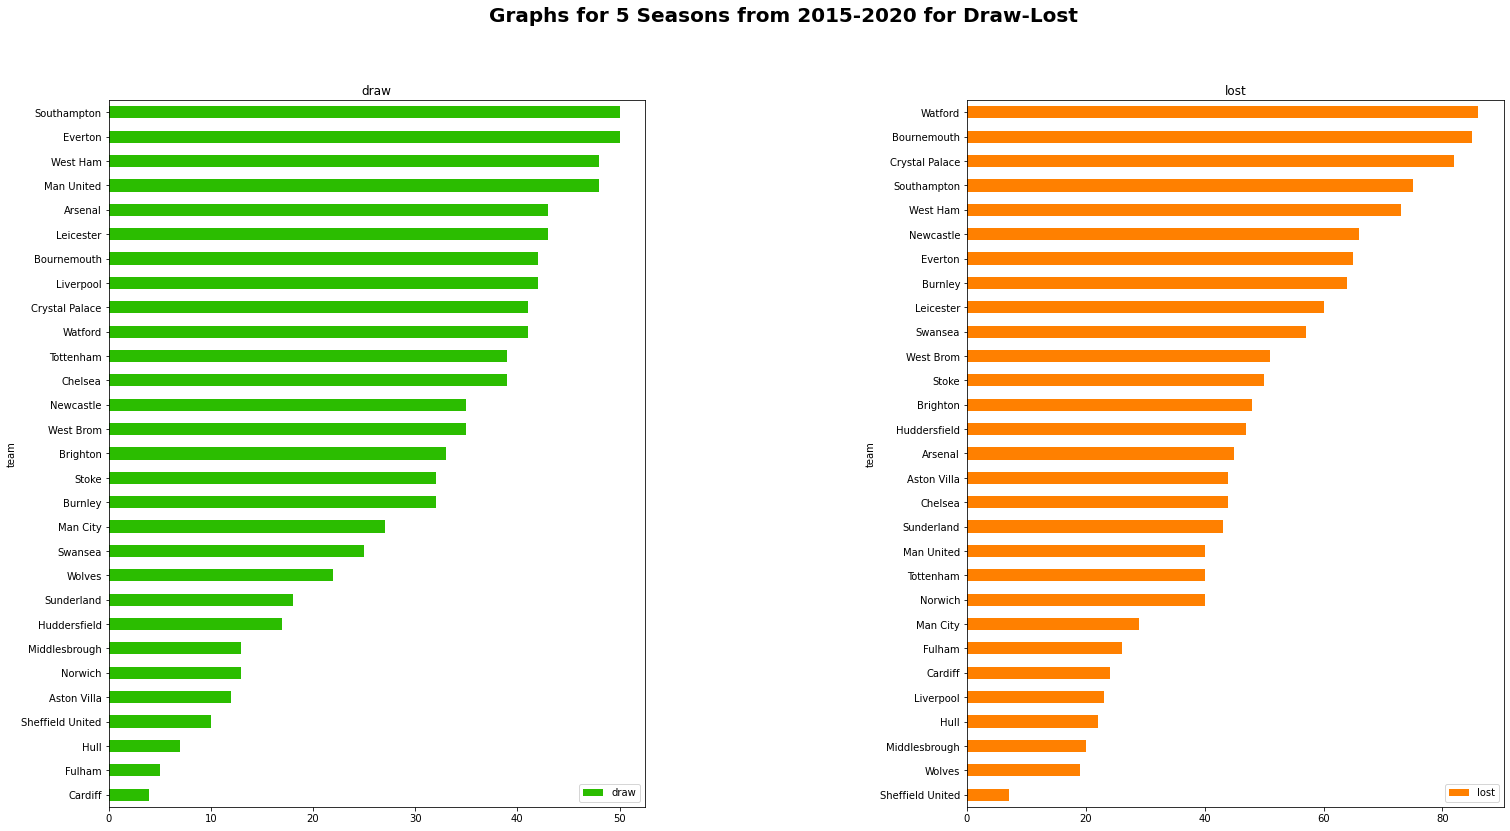

In [4]:
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(25,13))
plt.subplots_adjust(hspace=0.25,  wspace=0.6)
columns1.sort_values('draw').plot.barh(ax=axes[0],x="team", y="draw", subplots=True, color='#2BBD00')
columns1.sort_values('lost').plot.barh(ax=axes[1],x="team", y="lost", subplots=True, color='#FF8000')
plt.ylabel("team")
plt.suptitle("Graphs for 5 Seasons from 2015-2020 for Draw-Lost",weight='bold',size=20)
plt.savefig("Graphs for 5 Seasons from 2015-2020 for Draw-Lost.jpg")

In [5]:
top_6_points = columns1 [['team', 'points']] [:6] 
top_6_points

,team,points
0,Arsenal,319
1,Aston Villa,42
2,Bournemouth,204
3,Brighton,105
4,Burnley,173
5,Cardiff,34


In [6]:
df2 = table1.groupby('Season')
df2

In [7]:
table2 = season = df2.get_group('2019-2020')
table2

,Date,home_team,away_team,half_Time_score,full_Time_score,firsthalf_home_goals,firsthalf_away_goals,total_home_goals,total_away_goals,firsthalf_result,result,Season
1520,Fri Aug 9 2019,Liverpool,Norwich,4-0,4-1,4,0,4,1,Liverpool,Liverpool,2019-2020
1521,Sat Aug 10 2019,West Ham,Man City,0-1,0-5,0,1,0,5,Man City,Man City,2019-2020
1522,Sat Aug 10 2019,Bournemouth,Sheffield United,0-0,1-1,0,0,1,1,Draw,Draw,2019-2020
1523,Sat Aug 10 2019,Burnley,Southampton,0-0,3-0,0,0,3,0,Draw,Burnley,2019-2020
1524,Sat Aug 10 2019,Crystal Palace,Everton,0-0,0-0,0,0,0,0,Draw,Draw,2019-2020
...,...,...,...,...,...,...,...,...,...,...,...,...
1803,Sat Mar 7 2020,Wolves,Brighton,0-0,0-0,0,0,0,0,Draw,Draw,2019-2020
1804,Sat Mar 7 2020,Burnley,Tottenham,1-0,1-1,1,0,1,1,Burnley,Draw,2019-2020
1805,Sun Mar 8 2020,Chelsea,Everton,2-0,4-0,2,0,4,0,Chelsea,Chelsea,2019-2020
1806,Sun Mar 8 2020,Man United,Man City,1-0,2-0,1,0,2,0,Man United,Man United,2019-2020


In [8]:
df_games_1 = pd.DataFrame({'home_games' : table2.groupby("home_team")['home_team'].count()}).reset_index()
df_games_2 = pd.DataFrame({'away_games' : table2.groupby("away_team")['away_team'].count()}).reset_index()

df_games = pd.concat([df_games_1, df_games_2], axis=1)
df_games['games'] = df_games_1['home_games'] + df_games_2['away_games']
df_games = df_games.drop(columns=['away_team', 'home_games', 'away_games'])
df_games = df_games.rename(columns={'home_team': 'team'})

df_home_goals = pd.DataFrame({'home_goals' : table2.groupby("home_team")['total_home_goals'].sum()}).reset_index()
df_away_goals = pd.DataFrame({'away_goals' : table2.groupby("away_team")['total_away_goals'].sum()}).reset_index()

df_goals_scored = pd.concat([df_home_goals, df_away_goals], axis=1)
df_goals_scored['goals'] = df_goals_scored['home_goals'] + df_goals_scored['away_goals']
df_goals_scored = df_goals_scored.drop(columns=['away_team', 'home_goals', 'away_goals'])
df_goals_scored = df_goals_scored.rename(columns={'home_team': 'team'})

columns = df_games.copy()
columns = columns.merge(right=df_goals_scored, on='team')

df_won = pd.DataFrame({'won' : table2['result'].value_counts()}).reset_index()
df_won = df_won.drop([0])
df_won = df_won.rename(columns={'index': 'team'})

columns1 = columns.copy()
columns1 = columns1.merge(right=df_won, on='team')

draw_filter = table2[table2['result'] == 'Draw']
df_draw_home = pd.DataFrame({'draw_home' : draw_filter['home_team'].value_counts()}).reset_index()
df_draw_away = pd.DataFrame({'draw_away' : draw_filter['away_team'].value_counts()}).reset_index()

df_draw = df_draw_home.merge(right=df_draw_away, on='index')
df_draw['draw'] = df_draw['draw_home'] + df_draw['draw_away']
df_draw = df_draw.drop(columns=['draw_home', 'draw_away'])
df_draw = df_draw.rename(columns={'index': 'team'})
df_draw

columns1 = columns1.merge(right=df_draw, on='team')
columns1['lost'] = columns1['games'] - columns1['won'] - columns1['draw']
columns1['points'] = (columns1['won'] * 3) + (columns1['draw'])
columns1 = columns1.sort_values(by='points', ascending=False)
columns1['pos'] = range(1,len(columns1)+1)
columns1 = columns1[['team', 'games', 'won', 'draw', 'lost', 'points']]
columns1

,team,games,won,draw,lost,points
0,Arsenal,28,9,13,6,40
1,Aston Villa,28,7,4,17,25
2,Bournemouth,29,7,6,16,27
3,Brighton,29,6,11,12,29
4,Burnley,29,11,6,12,39
5,Chelsea,29,14,6,9,48
6,Crystal Palace,29,10,9,10,39
7,Everton,29,10,7,12,37
8,Leicester,29,16,5,8,53
9,Man City,28,18,3,7,57


In [9]:
top_points_2019_20 = columns1 [['team', 'points']] [:6] 
top_points_2019_20

,team,points
0,Arsenal,40
1,Aston Villa,25
2,Bournemouth,27
3,Brighton,29
4,Burnley,39
5,Chelsea,48


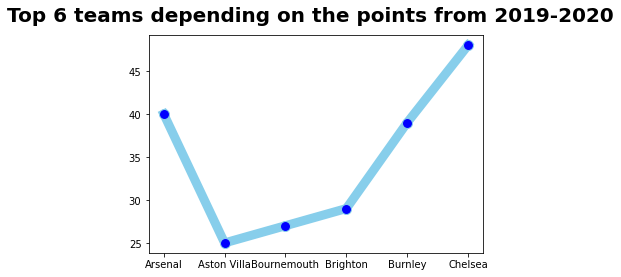

In [10]:
plt.plot( 'team', 'points', data=top_points_2019_20, marker='o', markerfacecolor='blue', markersize=10, color='skyblue', linewidth=9)
rcParams['figure.figsize'] = 10,10
plt.suptitle("Top 6 teams depending on the points from 2019-2020",weight='bold',size=20)
plt.savefig("Top 6 teams depending on the points from 2019-2020.jpg")
plt.show()

In [11]:
players = pd.read_csv('players-2015-to-2016-stats.csv')
players

,full_name,age,birthday,birthday_GMT,league,season,position,Current_Club,minutes_played_overall,minutes_played_home,...,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
0,Aaron Cresswell,32,629683200,12/15/1989,Premier League,2015/2016,Defender,West Ham United,3315,1620,...,1.30,69,90,3315,829,0.03,216,136,103,10
1,Aaron Lennon,34,545529600,4/16/1987,Premier League,2015/2016,Midfielder,Everton,1538,654,...,1.40,64,62,1538,0,0.06,66,281,-1,4
2,Aaron Ramsey,31,662169600,12/26/1990,Premier League,2015/2016,Midfielder,Arsenal,2623,1275,...,0.86,105,85,656,656,0.14,110,98,-1,4
3,Abdul Rahman Baba,27,773107200,7/2/1994,Premier League,2015/2016,Defender,Chelsea,1017,495,...,0.97,92,68,1017,1017,0.09,298,156,42,24
4,Ádám Bogdán,34,559699200,9/27/1987,Premier League,2015/2016,Goalkeeper,Liverpool,180,0,...,2.00,45,90,0,0,0.00,-1,-1,-1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,Yohan Benalouane,34,543888000,3/28/1987,Premier League,2015/2016,Defender,Leicester City,64,15,...,1.41,64,16,64,0,1.41,-1,-1,-1,18
640,Yohan Cabaye,35,506044800,1/14/1986,Premier League,2015/2016,Midfielder,Crystal Palace,2703,1415,...,1.03,87,82,386,2703,0.23,111,231,-1,3
641,Younes Kaboul,36,505180800,1/4/1986,Premier League,2015/2016,Defender,Sunderland,2009,962,...,1.21,74,87,402,2009,0.22,322,219,82,19
642,Youssouf Chafiq Mulumbu Ngangu,34,538531200,1/25/1987,Premier League,2015/2016,Midfielder,Norwich City,370,90,...,1.95,46,53,370,0,0.24,281,323,-1,15


In [12]:
players.drop(['birthday', 'birthday_GMT','nationality' ,'minutes_played_overall', 'minutes_played_home', 'minutes_played_away',
             'goals_away','assists_away','goals_per_90_home','min_per_goal_overall','age','position','league','rank_in_league_top_midfielders',
             'appearances_home','appearances_away','goals_home','assists_home', 'penalty_goals','penalty_misses',
             'conceded_overall','conceded_home','conceded_away','goals_involved_per_90_overall',
             'assists_per_90_overall','goals_per_90_overall','goals_per_90_away','conceded_per_90_overall',
             'min_per_conceded_overall','min_per_match','min_per_card_overall','min_per_assist_overall',
             'cards_per_90_overall','rank_in_league_top_attackers','rank_in_league_top_defenders',
             'rank_in_club_top_scorer','clean_sheets_overall','clean_sheets_home','clean_sheets_away'], axis=1, inplace=True)

In [13]:
top_player = players.nlargest(2,['goals_overall'])
top_player

,full_name,season,Current_Club,appearances_overall,goals_overall,assists_overall,yellow_cards_overall,red_cards_overall
228,Harry Kane,2015/2016,Tottenham Hotspur,38,25,1,5,0
266,Jamie Vardy,2015/2016,Leicester City,36,24,6,7,1


<Figure size 720x1296 with 0 Axes>

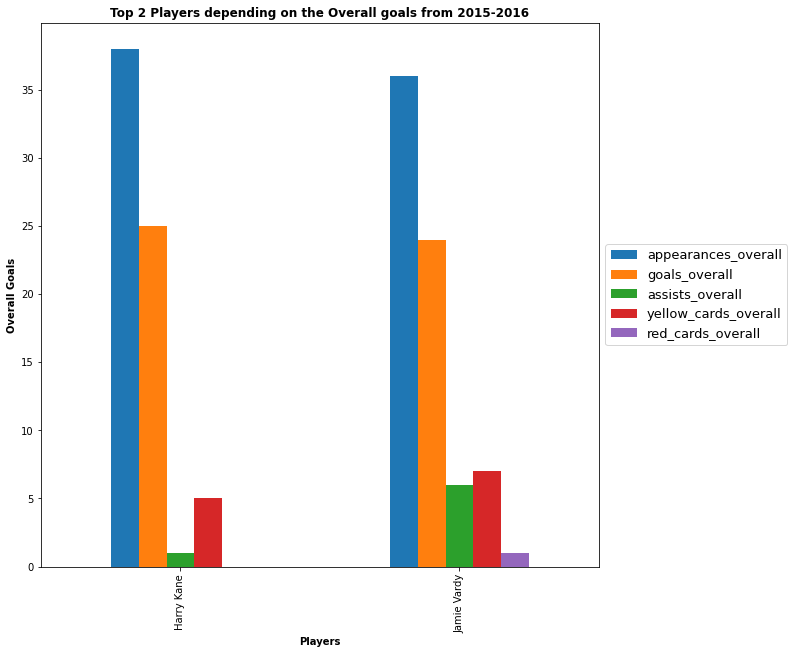

In [14]:
top_player.index=["Harry Kane", "Jamie Vardy"]
plt.figure(figsize=(10,18))
top_player.plot(kind='bar')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=13)
plt.title("Top 2 Players depending on the Overall goals from 2015-2016",weight='bold')
plt.xlabel("Players",weight='bold')
plt.ylabel("Overall Goals",weight='bold')
  
# Saving figure by changing parameter values
plt.savefig("Top 2 Players depending on the Overall goals from 2015-2016", bbox_inches="tight",
            pad_inches=0.3, transparent=False)